## Performing Cluster Analysis on the CMEG Training File

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\subha\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\subha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\subha\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\subha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cmeg_df = pd.read_excel('cmeg_df_case_competition_scrambled_train.xlsx', sheet_name='Data')

In [3]:
cmeg_df.head()

,ROW,Corp_Residence_Country_Code,BR Code,Period,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,...,RETAINED_EARNINGS_Y1,RETAINED_EARNINGS_Y2,RETAINED_EARNINGS_Y3,FCF_Y0,FCF_Y1,FCF_Y2,CCE_Y0,CCE_Y1,CCE_Y2,CCE_Y3
0,5662,1,5,2017Q4,1576,5,1,575863.911214,602838.635998,583646.469630,...,597031.247138,600893.706501,590802.111805,606861.990009,570523.662855,NaN,575350.400174,571025.770698,603242.309649,622846.821734
1,16369,1,5,2015Q4,4545,7,1,599469.364624,615373.028208,612705.047096,...,621227.589036,594596.565749,NaN,NaN,NaN,NaN,615104.995291,615953.218376,589034.257388,NaN
2,2326,0,12,2015Q2,648,8,1,613829.072017,575020.270272,NaN,...,619380.184641,NaN,NaN,586607.548841,584847.736742,NaN,580199.620976,605016.760749,NaN,NaN
3,38131,0,19,2017Q3,13395,5,1,585059.299344,581915.869330,594033.887481,...,613180.540495,585288.491695,576526.161339,604725.209898,579187.232468,628406.498679,587097.755174,615814.454998,599338.620711,588454.089187
4,36605,0,19,2015Q3,12998,6,1,605966.227164,593540.797737,NaN,...,575840.218046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cmeg_df = cmeg_df.sort_values(by = ['ROW'], ascending=False)

In [5]:
for i in range(cmeg_df.shape[1]):
    n_miss = cmeg_df.iloc[:, [i]].isnull().sum()
    perc = n_miss / cmeg_df.shape[0] * 100
    print('> %s, Missing: %d (%.1f%%)' % (cmeg_df.columns[i], n_miss, perc))

> ROW, Missing: 0 (0.0%)
> Corp_Residence_Country_Code, Missing: 0 (0.0%)
> BR Code, Missing: 0 (0.0%)
> Period, Missing: 0 (0.0%)
> CUSTOMER_ID, Missing: 0 (0.0%)
> Final_IG, Missing: 0 (0.0%)
> B_PLUS_FLAG, Missing: 0 (0.0%)
> EBITDA_Y0, Missing: 597 (2.1%)
> EBITDA_Y1, Missing: 2361 (8.4%)
> EBITDA_Y2, Missing: 8434 (29.9%)
> EBITDA_Y3, Missing: 14186 (50.3%)
> TOTALASSET_Y0, Missing: 381 (1.3%)
> TOTALASSET_Y1, Missing: 2210 (7.8%)
> TOTALASSET_Y2, Missing: 8292 (29.4%)
> TOTALASSET_Y3, Missing: 14112 (50.0%)
> TOTALDEBT_Y0, Missing: 875 (3.1%)
> TOTALDEBT_Y1, Missing: 2718 (9.6%)
> TOTALDEBT_Y2, Missing: 8714 (30.9%)
> TOTALDEBT_Y3, Missing: 14358 (50.9%)
> TOTALREVENUE_Y0, Missing: 819 (2.9%)
> TOTALREVENUE_Y1, Missing: 2577 (9.1%)
> TOTALREVENUE_Y2, Missing: 8591 (30.4%)
> TOTALREVENUE_Y3, Missing: 14290 (50.6%)
> CURRENTASSET_Y0, Missing: 789 (2.8%)
> CURRENTASSET_Y1, Missing: 2585 (9.2%)
> CURRENTASSET_Y2, Missing: 8571 (30.4%)
> CURRENTASSET_Y3, Missing: 14269 (50.6%)
> FIXED

In [6]:
#non-financial features
non_fin_features = ['ROW', 'Corp_Residence_Country_Code', 'BR Code', 'Period', 'CUSTOMER_ID', 'Final_IG', 'B_PLUS_FLAG']
#financial features
fin_features = np.sort(list(set(cmeg_df.columns) - set(non_fin_features)))

In [7]:
#Calculating 3 year average values
def three_year_average(X, col_y0, col_y1, col_y2, col):
    X.drop(X[X[col_y0].isnull()].index, inplace = True)
    
    X[col] = X[col_y0]
    
    two_years_average = X[col_y1].notnull() & X[col_y2].isnull()
    X.loc[two_years_average, col] = X.loc[two_years_average, col_y0] * 4/7 + X.loc[two_years_average, col_y1] * 3/7
    
    three_years_average = X[col_y1].notnull() & X[col_y2].notnull()
    X.loc[three_years_average, col] = X.loc[three_years_average, col_y0] * 4/9 + X.loc[three_years_average, col_y1] * 3/9 + X.loc[three_years_average, col_y2] * 2/9
    
    return X

cols_to_avg = []

for col in fin_features:
    if (col.endswith('Y0') and not col.endswith('growth_Y0')):
        cols_to_avg.append([col, col[:-2] + 'Y1', col[:-2] + 'Y2', col[:-2] + '3YearAverage'])

data_left = cmeg_df.copy()
for col0, col1, col2, col in cols_to_avg:
    orig_num_data = len(data_left)
    data_left = three_year_average(data_left, col0, col1, col2, col)
    remaining_data = len(data_left)
    print((orig_num_data - remaining_data), 'data records are dropped due to ' + col + '\n')

1024 data records are dropped due to ARTurnover_3YearAverage

75 data records are dropped due to ASSETTURNOVER_3YearAverage

61 data records are dropped due to CAPITALIZATION_3YearAverage

280 data records are dropped due to CCE_3YearAverage

0 data records are dropped due to CURRENTASSET_3YearAverage

0 data records are dropped due to CURRENTLIABILITY_3YearAverage

2266 data records are dropped due to Capex2Dep_3YearAverage

0 data records are dropped due to DEBTSERVCOV_3YearAverage

0 data records are dropped due to EBITDAR_3YearAverage

0 data records are dropped due to EBITDA_3YearAverage

4462 data records are dropped due to FCF_3YearAverage

0 data records are dropped due to FIXEDASSET_3YearAverage

0 data records are dropped due to FIXEDCHARGECOV_3YearAverage

2501 data records are dropped due to INVENTORYDAYS_3YearAverage

0 data records are dropped due to Inventory_3YearAverage

0 data records are dropped due to LEASERENTEXP_3YearAverage

0 data records are dropped due to NETP

In [8]:
data_left = data_left.reset_index(drop = True)

In [9]:
#Calculating financial ratios
for i in range(4):
    data_left['DEBT2EBITDA_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['EBITDA_Y' + str(i)]
    data_left['DEBT2CAPT_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['CAPITALIZATION_Y' + str(i)]
    data_left['DEBT2EQUITY_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['TOTALEQUITY_Y' + str(i)]
    data_left['DEBT2ASSET_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['TOTALASSET_Y' + str(i)]
    data_left['DEBT2TANGIBLENW_Y'+str(i)] = data_left['TOTALDEBT_Y'+str(i)] / data_left['tangibleNetWorth_Y' + str(i)]
    data_left['CASH2ASSET_Y'+str(i)] = data_left['CCE_Y'+str(i)] / data_left['TOTALASSET_Y' + str(i)]
    data_left['CASH2DEBT_Y'+str(i)] = data_left['CCE_Y'+str(i)] / data_left['TOTALDEBT_Y' + str(i)]
    data_left['CA2CL_Y'+str(i)] = data_left['CURRENTASSET_Y'+str(i)] / data_left['CURRENTLIABILITY_Y' + str(i)]
    
for i in range(3):
    data_left['DEBT2FCF_Y'+str(i)] = data_left['TOTALDEBT_Y' + str(i)] / data_left['FCF_Y'+str(i)]

In [10]:
#Adding new financial features
new_feat = ['DEBT2EBITDA_Y','DEBT2CAPT_Y', 'DEBT2EQUITY_Y', 'DEBT2ASSET_Y', 'DEBT2TANGIBLENW_Y', 'CASH2ASSET_Y', 'CASH2DEBT_Y', 'CA2CL_Y']
for i in range(4):
    for feat in new_feat:
        fin_features = list(fin_features) + list([feat + str(i)])

for i in range(3):
    fin_features = list(fin_features) + list(['DEBT2FCF_Y'+str(i)])

fin_features = np.sort(fin_features)

In [11]:
#Removing irrelevant columns for clustering
actual = data_left.drop(['ROW', 'Corp_Residence_Country_Code', 'BR Code', 'Period'], axis=1)


In [12]:
actual = actual.dropna()

In [13]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(actual.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=actual.columns)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,CUSTOMER_ID,Final_IG,B_PLUS_FLAG,EBITDA_Y0,EBITDA_Y1,EBITDA_Y2,EBITDA_Y3,TOTALASSET_Y0,TOTALASSET_Y1,TOTALASSET_Y2,...,DEBT2CAPT_Y3,DEBT2EQUITY_Y3,DEBT2ASSET_Y3,DEBT2TANGIBLENW_Y3,CASH2ASSET_Y3,CASH2DEBT_Y3,CA2CL_Y3,DEBT2FCF_Y0,DEBT2FCF_Y1,DEBT2FCF_Y2
0,2.000332,0.046412,0.436739,-0.110820,0.628456,1.073529,0.156721,0.153603,-0.017849,0.037649,...,-1.060923,0.872074,-0.038508,-0.764026,-0.487381,-0.593965,-0.772832,-0.472491,0.434923,-0.790448
1,2.000332,0.046412,0.436739,0.866171,0.279861,-0.756630,-0.000948,-0.412547,-0.441939,-0.545303,...,0.522594,1.120384,1.365708,-0.144580,1.429356,0.326559,0.810077,0.007950,-0.403277,0.136233
2,2.000084,0.990411,-2.289695,0.675555,0.681450,0.673608,0.025987,0.351883,0.368139,-0.315582,...,0.315878,0.667412,0.383027,0.230441,0.420397,0.115721,-0.717257,-0.148444,0.975308,-0.654989
3,1.999341,1.934410,-2.289695,-1.078939,-1.286587,-0.607305,-0.156414,0.258315,-0.033987,0.227490,...,-0.821706,-0.250739,-0.705289,-0.793379,0.094738,0.914096,0.232021,0.575787,-0.515164,0.048778
4,1.999341,1.934410,-2.289695,0.527819,0.805129,1.348664,-0.159415,-0.256026,-0.515008,-0.317525,...,-1.055586,-0.213349,0.080983,-0.520351,-0.296877,-0.475316,-1.272504,0.738173,-0.439196,0.182153


In [14]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

Performing K-means and obtaining the distortions

In [15]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
    kmeanModel.fit(df_scaled)
 
    distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_scaled.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_scaled.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairw

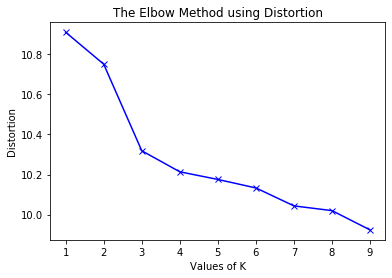

In [16]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Ideally 8 should be the clusters from the elbow method, but we found that if we do analysis on 8 clusters some of the clusters have very few records. Hence we decided to use 4 clusters.

In [17]:
#obraining the centroids
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(df_scaled)
centroids = kmeans.cluster_centers_

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairw

In [18]:
#Obtaining the count for each cluster
labels = kmeans.predict(df_scaled)
from collections import Counter
Counter(labels)

C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\subha\Anaconda3\lib\site-packages\sklearn\metrics\pairw

Counter({0: 6332, 1: 1067, 3: 71, 2: 15})

We can see that there are 3 major clusters and hence we look at those in detail

In [19]:
df_scaled['cluster'] = labels

In [20]:
actual['cluster'] = labels

In [21]:
plot_df = actual[(actual.cluster == 1) | (actual.cluster == 0) | (actual.cluster == 3) ]

In [22]:
column_plot = [
    'TOTALASSET_3YearAverage',
    'TOTALDEBT_3YearAverage',
    'TOTALREVENUE_3YearAverage',
    'TOTALEQUITY_3YearAverage',
    'TOTALNETWORTH_3YearAverage',
    'NETPROFIT_3YearAverage',
    'NETSALES_3YearAverage',
    'DEBT2CAPT_Y0',
    'DEBT2ASSET_Y0',
    'DEBT2EQUITY_Y0',
    'CASH2ASSET_Y0'
]

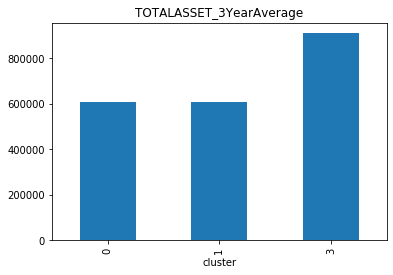

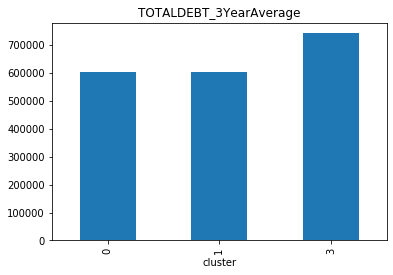

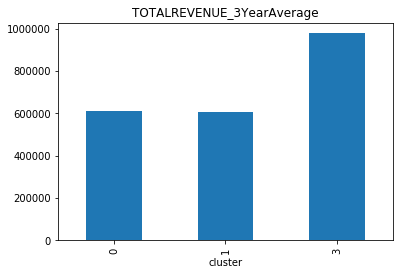

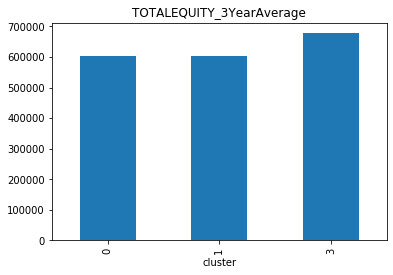

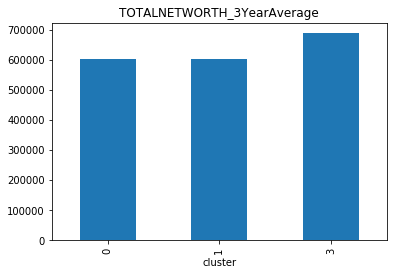

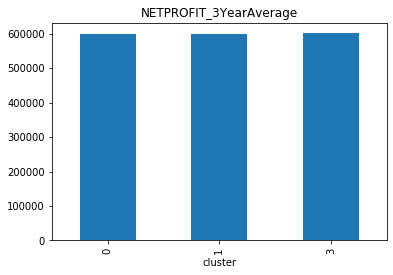

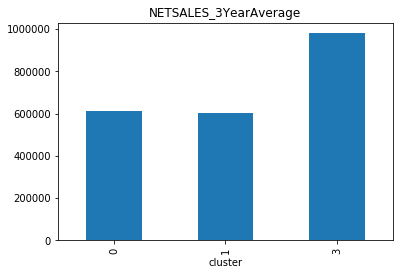

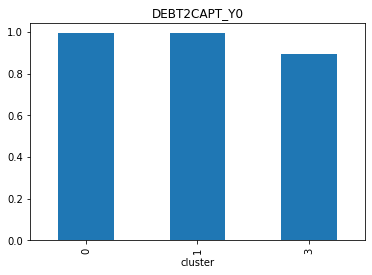

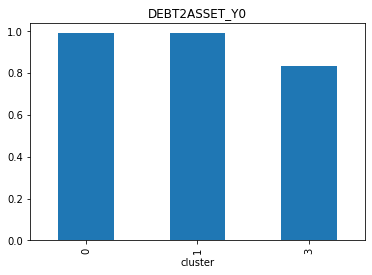

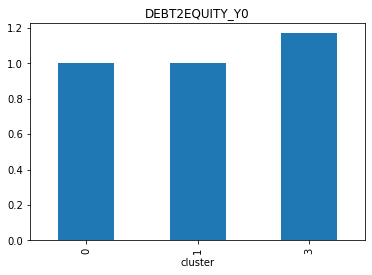

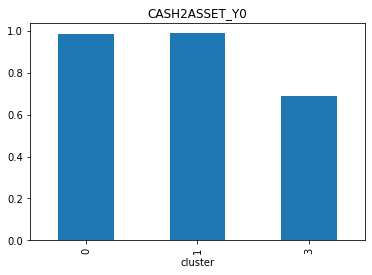

In [23]:
for c in column_plot:
    plot_df.groupby(['cluster'])[c].mean().plot(kind = 'bar', subplots = True)
    plt.show()

From the above images, we can see that the first 2 clusters can be combined together and can be said to be Medium-sized companies whereas the last cluster due to higher assets and revenue in average can be said to be Medium-High thereby forming 2 main clusters. This makes sense since the entire data file is for Canadian Medium-sized firms.

In [24]:
plot_df.groupby(['cluster','Final_IG']).size()

cluster  Final_IG
0        1              2
         2             30
         3            105
         4            522
         5            815
         6           1141
         7           1384
         8           1299
         9            472
         10           228
         11           168
         12            69
         13            41
         14            11
         15             1
         17            44
1        1              1
         2             16
         3             52
         4            113
         5            166
         6            237
         7            182
         8            167
         9             84
         10            19
         11            14
         12             8
         13             5
         17             3
3        2              2
         4              1
         5              5
         6              6
         7             19
         8             13
         9             10
         10         

Obtaining the count of each Final_IG value in each cluster

In [25]:
plot_df.groupby(['cluster','B_PLUS_FLAG']).size()

cluster  B_PLUS_FLAG
0        0              1034
         1              5298
1        0               133
         1               934
3        0                25
         1                46
dtype: int64

Obtaining the count of B_PLUS_FLAG in each cluster